# Homework 2

Visualize, describe, and model distributions

Allen Downey

[MIT License](https://en.wikipedia.org/wiki/MIT_License)

In [2]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

Here are some of the functions from Chapter 5.

In [3]:
def MakeNormalModel(values, label=''):
    """Plots a CDF with a Normal model.

    values: sequence
    """
    cdf = thinkstats2.Cdf(values, label=label)

    mean, var = thinkstats2.TrimmedMeanVar(values)
    std = np.sqrt(var)
    print('n, mean, std', len(values), mean, std)

    xmin = mean - 4 * std
    xmax = mean + 4 * std

    xs, ps = thinkstats2.RenderNormalCdf(mean, std, xmin, xmax)
    thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8')
    thinkplot.Cdf(cdf)

In [152]:
def MakeNormalPlot(values, label='',color='red'):
    """Generates a normal probability plot.

    values: sequence
    """
    #mean, var = thinkstats2.TrimmedMeanVar(values, p=0.01)
    #std = np.sqrt(var)

    #xs = [-5, 5]
    #xs1, ys1 = thinkstats2.FitLine(xs, mean, std)
    #thinkplot.Plot(xs1, ys1, color='0.8', label='model')

    xs2, ys2 = thinkstats2.NormalProbability(values)
    thinkplot.Plot(xs2, ys2,style='bo',alpha=0.3, label=label,
                   color=color)

Read the GSS data again.

In [5]:
%time gss = pd.read_hdf('gss.hdf5', 'gss')
gss.shape

CPU times: user 34 ms, sys: 21 ms, total: 54.9 ms
Wall time: 128 ms


(62466, 101)

In [6]:
gss.tail()

,year,id_,agewed,divorce,sibs,childs,age,educ,paeduc,maeduc,...,memchurh,realinc,cohort,marcohrt,ballot,wtssall,adults,compuse,databank,wtssnr
62461,2016,86,NaN,NaN,0.0,2.0,52.0,12.0,12,12,...,0,21060.0000,1964.0,0,1,0.782182,1.0,1,0,1.030229
62462,2016,1927,NaN,1.0,1.0,2.0,78.0,12.0,8,8,...,0,9945.0000,1938.0,0,2,0.478497,1.0,2,0,0.431552
62463,2016,1327,NaN,1.0,8.0,4.0,51.0,16.0,2,2,...,0,131676.6906,1965.0,0,3,1.435490,3.0,0,0,1.140290
62464,2016,2493,NaN,1.0,3.0,2.0,71.0,20.0,10,12,...,0,21060.0000,1945.0,0,3,0.478497,1.0,0,0,0.452795
62465,2016,1188,NaN,1.0,3.0,1.0,70.0,15.0,97,13,...,0,15210.0000,1946.0,0,3,0.782182,1.0,0,0,0.898125


Most variables use special codes to indicate missing data.  We have to be careful not to use these codes as numerical data; one way to manage that is to replace them with `NaN`, which Pandas recognizes as a missing value.

In [7]:
def replace_invalid(df):
    df.realinc.replace([0], np.nan, inplace=True)                  
    df.educ.replace([98,99], np.nan, inplace=True)
    # 89 means 89 or older
    df.age.replace([98, 99], np.nan, inplace=True) 
    df.cohort.replace([9999], np.nan, inplace=True)
    df.adults.replace([9], np.nan, inplace=True)

replace_invalid(gss)

In [8]:
gss.age.value_counts().sort_index()

18.0     491
19.0    1683
20.0    1620
21.0    1575
22.0    1551
23.0    1602
24.0    1444
25.0    1408
26.0    1317
27.0    1324
28.0    1236
29.0    1239
30.0    1251
31.0    1150
32.0    1231
33.0    1179
34.0    1110
35.0    1092
36.0    1204
37.0    1134
38.0    1189
39.0     996
40.0    1274
41.0    1167
42.0    1192
43.0    1182
44.0    1197
45.0    1214
46.0    1223
47.0    1264
        ... 
60.0     828
61.0     811
62.0     822
63.0     696
64.0     610
65.0     678
66.0     547
67.0     566
68.0     574
69.0     472
70.0     572
71.0     451
72.0     482
73.0     440
74.0     432
75.0     337
76.0     321
77.0     274
78.0     256
79.0     173
80.0     162
81.0     208
82.0     185
83.0     139
84.0     129
85.0     107
86.0     101
87.0      74
88.0      65
89.0     164
Name: age, Length: 72, dtype: int64

### Distribution of age

Here's the CDF of ages.

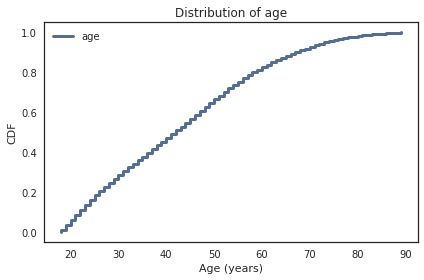

In [9]:
cdf_age = Cdf(gss.age)
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

**Exercise**:  Each of the following cells shows the distribution of ages under various transforms, compared to various models.  In each text cell, add a sentence or two that interprets the result.  What can we say about the distribution of ages based on each figure?

1) Here's the CDF of ages compared to a normal distribution with the same mean and standard deviation.

Interpretation: 
The CDF is approximately linear (until you get to higher ages), which means that for most ages the sample is roughly uniform. Since it flattens out as the age gets higher we know that there were relatively less older people sampled than younger. Since the higher age tail is a better fit to the model than the lower age tail that also points to their being more younger samples than older. Since the youngest people who could be sampled are only 18 that will also affect the distribution since it is not possible to have any samples below about -1.5 stds.

n, mean, std 62302 43.171252620545076 16.227904559013016


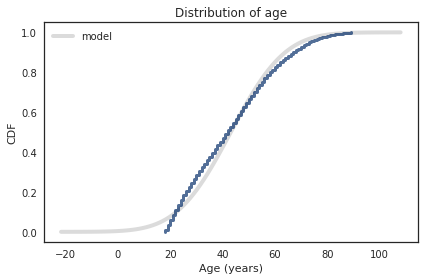

In [10]:
MakeNormalModel(gss.age.dropna(), label='')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF')

2) Here's a normal probability plot for the distribution of ages.

Interpretation: The sample is roughly uniform since there are more values at low and high standard deviations than would be expected from a normal distribution. The fact that those tails are flat until they intersect the normal model line means that there is roughly the same probability of getting any age in the sample. The shorter tail at positive standard deviations shows that there were less older people sampled than younger, which agrees with our previous result.

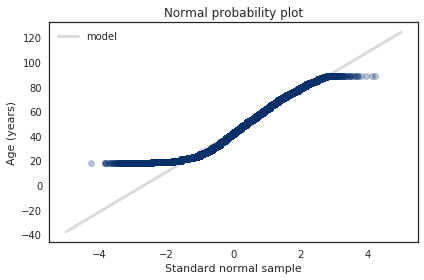

In [11]:
MakeNormalPlot(gss.age.dropna(), label='')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Age (years)')

3) Here's the complementary CDF on a log-y scale.

Interpretation: The plot is steepest at the oldest ages, which means there are less older ages sampled than younger ages, since this is a complementary CDF plot and in normal CDFs the steepest steps correspond to more of a certain sample value. The logarithmic scale further accentuates the larger samples.

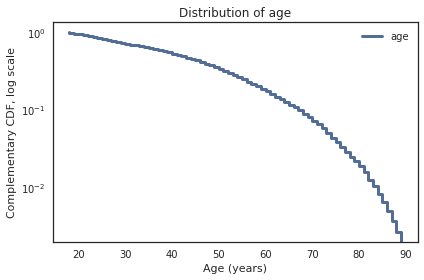

In [12]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF of ages on a log-x scale.

Interpretation: The log x scale this time gives more granularity to the lower samples, and the fact that it flattens out the larger the samples get shows that there are relatively more younger samples than older.

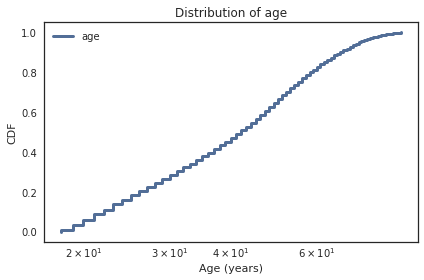

In [13]:
thinkplot.cdf(cdf_age, label='age')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of ages, compared to a normal model.

Interpretation: This is a relatively good fit to the normal model, at least in the middle; it does, however, seem to fit slightly less well than the non-log CDF of ages. It is limited and not possible for the tails to have data matched to them since people both too young and too old are not able to answer.

n, mean, std 62302 1.6027391972417524 0.17131981030095664


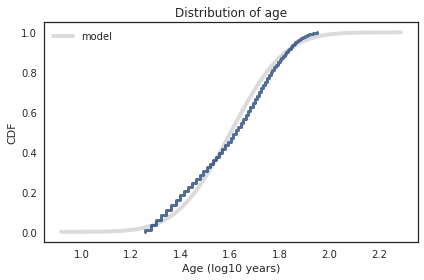

In [14]:
values = np.log10(gss.age.dropna())
MakeNormalModel(values, label='')

decorate(title='Distribution of age', 
         xlabel='Age (log10 years)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of ages.

Interpretation: Similar to the previous normal probability plot (non-log) the data fits a normal distribution in the middle, but not in the tails. Relatively more young samples than older samples.

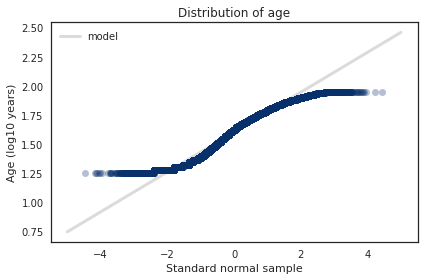

In [15]:
MakeNormalPlot(values, label='')

decorate(title='Distribution of age', 
         xlabel='Standard normal sample', 
         ylabel='Age (log10 years)')

7) Here's the complementary CDF on a log-log scale.

Interpretation: If this was a Pareto distribution, the data would be plotted in a straight line (CCDF, log-log scale), but that does not fit for any significant portion of the curve.

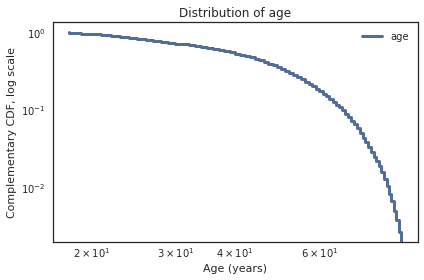

In [16]:
thinkplot.cdf(cdf_age, label='age', complement=True)

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='Complementary CDF, log scale',
         xscale='log',
         yscale='log')

8) Here's a test to see whether ages are well-modeled by a Weibull distribution.

Interpretation: It would be a straight line if it was modeled well by the Weibull distribution, and it is not.

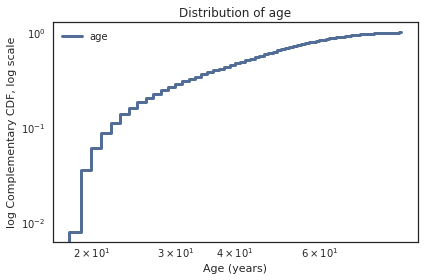

In [17]:
thinkplot.cdf(cdf_age, label='age', transform='Weibull')

decorate(title='Distribution of age', 
         xlabel='Age (years)', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

### Distribution of income

Here's the CDF of `realinc`.

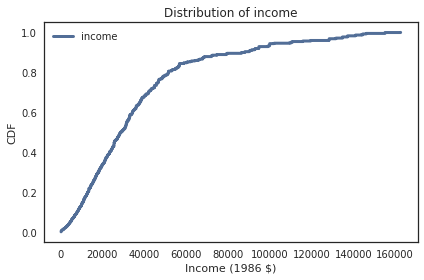

In [18]:
cdf_realinc = Cdf(gss.realinc)
thinkplot.cdf(cdf_realinc, label='income')
#MakeNormalModel(gss.realinc.dropna(),label='income')

decorate(title='Distribution of income', 
         xlabel='Income (1986 $)', 
         ylabel='CDF')

**Exercise:** Use visualizations like the ones in the previous exercise to see whether there is an analytic model that describes the distribution of `gss.realinc` well.

**The plot right below below has the best fit out of all of the tests. It suggests that the values have a (roughly) lognormal distribution.**

n, mean, std 54652 4.419927002059244 0.3778992784929812


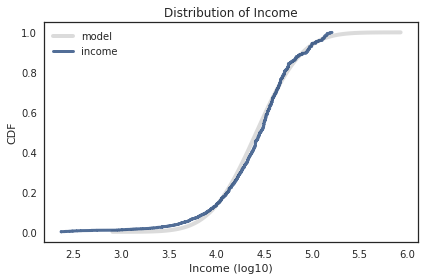

In [19]:
# Solution goes here
# Solution goes here
values1 = np.log10(gss.realinc.dropna())
MakeNormalModel(values1, label='income')

decorate(title='Distribution of Income', 
         xlabel='Income (log10)', 
         ylabel='CDF')

**The plot below shows that the data is a good fit for a lognormal distribution in the middle (between -2 and 2 stds), while the high and low ends deviate from the model**

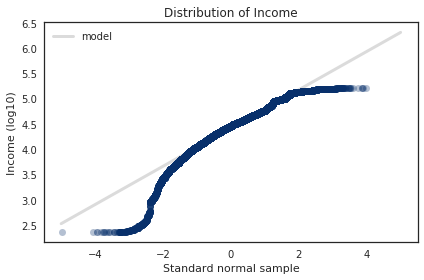

In [20]:
# Solution goes here
MakeNormalPlot(values1, label='')

decorate(title='Distribution of Income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10)')

2) Here's a normal probability plot for the values.

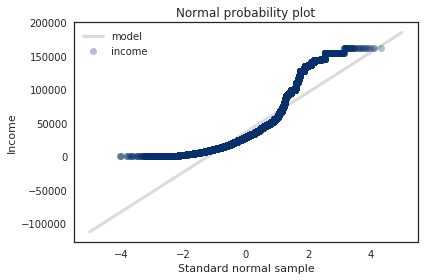

In [21]:
# Solution goes here
MakeNormalPlot(gss.realinc.dropna(), label='income')

decorate(title='Normal probability plot', 
         xlabel='Standard normal sample', 
         ylabel='Income')

3) Here's the complementary CDF on a log-y scale.

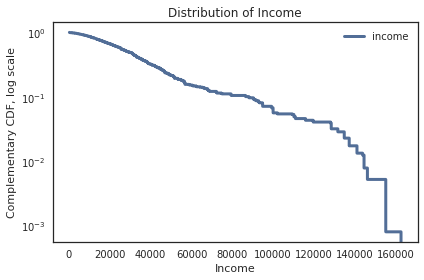

In [22]:
# Solution goes here
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of Income', 
         xlabel='Income', 
         ylabel='Complementary CDF, log scale',
         yscale='log')

4) Here's the CDF on a log-x scale.

n, mean, std 54652 36517.99031177538 29781.023832551175


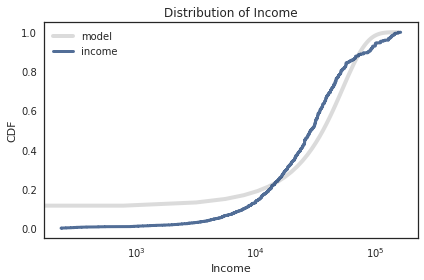

In [23]:
# Solution goes here
#thinkplot.cdf(cdf_realinc, label='income')
MakeNormalModel(gss.realinc.dropna(), label='income')

decorate(title='Distribution of Income', 
         xlabel='Income', 
         ylabel='CDF',
         xscale='log')

5) Here's the CDF of the logarithm of the values, compared to a normal model.

n, mean, std 54652 4.419927002059244 0.3778992784929812


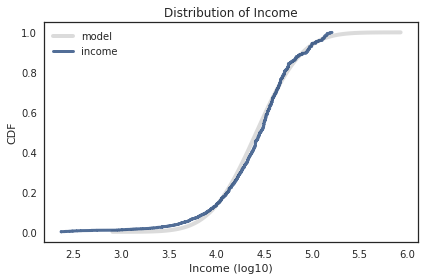

In [24]:
# Solution goes here
values1 = np.log10(gss.realinc.dropna())
MakeNormalModel(values1, label='income')

decorate(title='Distribution of Income', 
         xlabel='Income (log10)', 
         ylabel='CDF')

6) Here's a normal probability plot for the logarithm of the values.

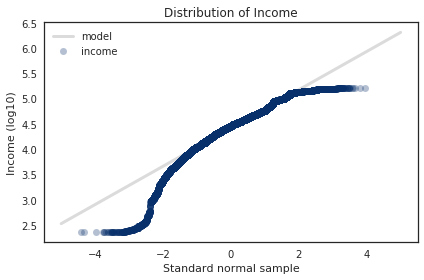

In [25]:
# Solution goes here
MakeNormalPlot(values1, label='income')

decorate(title='Distribution of Income', 
         xlabel='Standard normal sample', 
         ylabel='Income (log10)')

7) Here's the complementary CDF on a log-log scale.

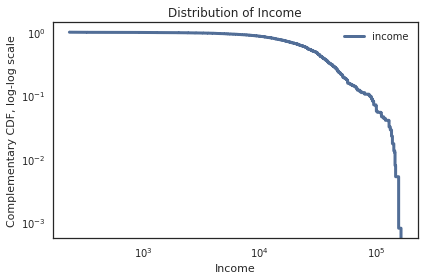

In [26]:
# Solution goes here
thinkplot.cdf(cdf_realinc, label='income', complement=True)

decorate(title='Distribution of Income', 
         xlabel='Income', 
         ylabel='Complementary CDF, log-log scale',
         yscale='log',
         xscale='log')

8) Here's a test to see whether the values are well-modeled by a Weibull distribution.

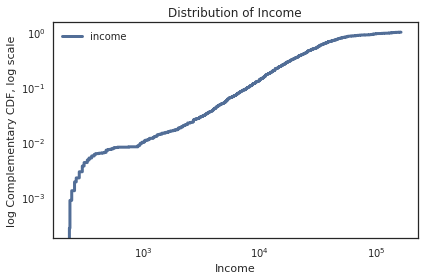

In [27]:
# Solution goes here
thinkplot.cdf(cdf_realinc, label='income', transform='Weibull')

decorate(title='Distribution of Income', 
         xlabel='Income', 
         ylabel='log Complementary CDF, log scale',
         xscale='log',
         yscale='log')

## BRFSS


In [28]:
%time brfss = pd.read_hdf('brfss.hdf5', 'brfss')
brfss.head()

CPU times: user 11.4 ms, sys: 15.5 ms, total: 26.9 ms
Wall time: 18.6 ms


,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,46.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,83.0
57312,2.0,163.0,72.57,8.0,390.248599,5.0,43.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,30.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,30.0


Let's look at the distribution of height in the BRFSS dataset.  Here's the CDF.

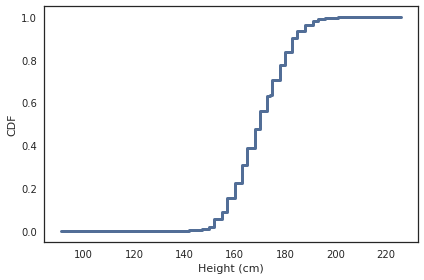

In [29]:
heights = brfss.HTM4

cdf_heights = Cdf(heights)
thinkplot.Cdf(cdf_heights)

decorate(xlabel='Height (cm)', ylabel='CDF')

To see whether a normal model describes this data well, we can use KDE to estimate the PDF.

In [30]:
from scipy.stats import gaussian_kde

Here's an example using the default bandwidth method.

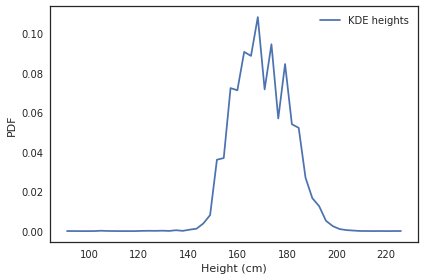

In [31]:
kde = gaussian_kde(heights.dropna())

xs = np.linspace(heights.min(), heights.max())
ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

It doesn't work very well; we can improve it by overriding the bandwidth with a constant.

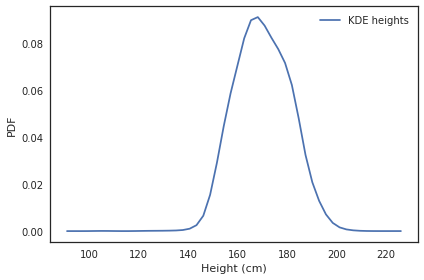

In [32]:
kde = gaussian_kde(heights.dropna(), bw_method=0.3)

ds = kde.evaluate(xs)
ds /= ds.sum()

plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

Now we can generate a normal model with the same mean and standard deviation.

In [33]:
mean = heights.mean()
std = heights.std()

mean, std

(170.09044280714292, 10.795080237191394)

Here's the model compared to the estimated PDF.

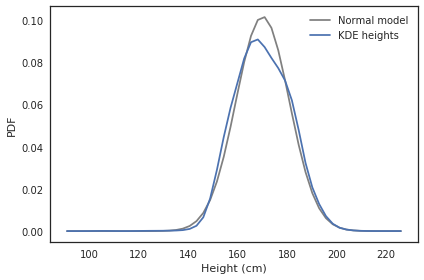

In [34]:
normal_pdf = thinkstats2.NormalPdf(mean, std)

ps = normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

The data don't fit the model particularly well, possibly because the distribution of heights is a mixture of two distributions, for men and women.

**Exercise:** Generate a similar figure for just women's heights and see if the normal model does any better.

In [35]:
# Solution goes here
# 2 = female

fem_heights = brfss.HTM4[brfss.SEX == 2].dropna()
fem_mean = fem_heights.mean()
fem_std = fem_heights.std()
fem_normal_pdf = thinkstats2.NormalPdf(fem_mean,fem_std)

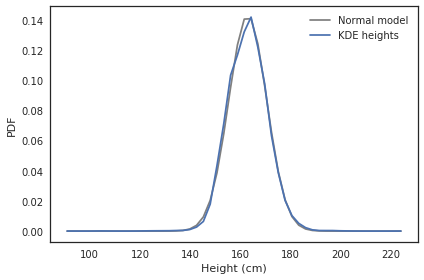

In [36]:
# Solution goes here
kde = gaussian_kde(fem_heights, bw_method=.3)
xs = np.linspace(fem_heights.min(),fem_heights.max())

ds = kde.evaluate(xs)
ds /= ds.sum()

ps = fem_normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

#THE NORMAL MODEL FITS MUCH BETTER AFTER SEPARATING MALES
#AND FEMALES

**Exercise:** Generate a similar figure for men's weights, `brfss.WTKG3`.  How well does the normal model fit?

**The normal model seems to fit very well**

In [37]:
# Solution goes here
m_weights = brfss.HTM4[brfss.SEX == 1].dropna()
m_mean = m_weights.mean()
m_std = m_weights.std()
m_normal_pdf = thinkstats2.NormalPdf(m_mean,m_std)

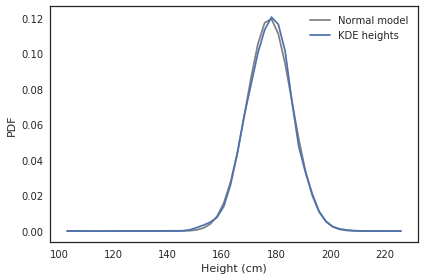

In [38]:
# Solution goes here
# Solution goes here
kde = gaussian_kde(m_weights, bw_method=.3)
xs = np.linspace(m_weights.min(),m_weights.max())

ds = kde.evaluate(xs)
ds /= ds.sum()

ps = m_normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

**Exercise:** Try it one more time with the log of men's weights.  How well does the normal model fit?  What does that imply about the distribution of weight?

**To ask Kaitlyn about implication**

In [39]:
# Solution goes here
m_weights = np.log10(brfss.HTM4[brfss.SEX == 1].dropna())
m_mean = m_weights.mean()
m_std = m_weights.std()
m_normal_pdf = thinkstats2.NormalPdf(m_mean,m_std)

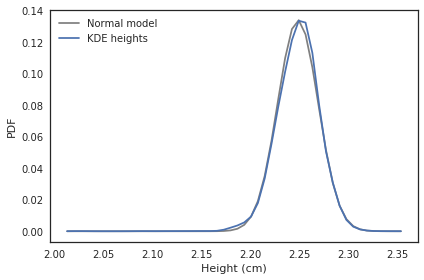

In [40]:
# Solution goes here
kde = gaussian_kde(m_weights, bw_method=.35)
xs = np.linspace(m_weights.min(),m_weights.max())

ds = kde.evaluate(xs)
ds /= ds.sum()

ps = m_normal_pdf.Density(xs)
ps /= ps.sum()

plt.plot(xs, ps, color='gray', label='Normal model')
plt.plot(xs, ds, label='KDE heights')

decorate(xlabel='Height (cm)', ylabel='PDF')

## Skewness

Let's look at the skewness of the distribution of weights for men and women.

In [41]:
male = (brfss.SEX == 1)
male_weights = brfss.loc[male, 'WTKG3']

In [42]:
female = (brfss.SEX == 2)
female_weights = brfss.loc[female, 'WTKG3']

As we've seen, these distributions are skewed to the right, so we expect the mean to be higher than the median. 

In [43]:
male_weights.mean(), male_weights.median()

(88.83871202341662, 86.18)

We can compute the moment-based sample skewness using Pandas or `thinkstats2`.  The results are almost the same.

In [44]:
male_weights.skew(), thinkstats2.Skewness(male_weights.dropna())

(1.2607915291363547, 1.2607508370740947)

But moment-based sample skewness is a terrible statistic!  A more robust alternative is Pearson's median skewness:

In [45]:
thinkstats2.PearsonMedianSkewness(male_weights.dropna())

0.3961356157532533

**Exercise:** Compute the same statistics for women.  Which distribution is more skewed?

In [46]:
female_weights.mean(), female_weights.median()

(73.6243871435631, 70.31)

In [47]:
female_weights.skew(), thinkstats2.Skewness(female_weights.dropna())

(1.3693028811523575, 1.3692590742841042)

In [48]:
thinkstats2.PearsonMedianSkewness(female_weights.dropna())

#THE FEMALE SKEW STATISTICS HAVE A LARGER MAGNITUDE THAN 
#THE MALES, SO THEY ARE MORE SKEWED

0.5268415056705406

**Exercise:** Explore the GSS or BRFSS dataset and find something interesting!

**I want to split respondents into 4 groups, the first criteria being gender and the second being whether the respondent has been divorced or not. Once this is done I will visualize distributions of these groups incomes to see where they deviate. I am guessing that across the board males will make more than females, while I am not quite sure about whether divorced or undivorced people will make sure, and whether the gender of the divorced person will affect their income.**

In [122]:
def calc_kde(values, bw_method=None, label='', xlab='',color='red'):
    
    values = values.dropna()
    mean = values.mean()
    std = values.std()
    normal_pdf = thinkstats2.NormalPdf(mean,std)
    kde = gaussian_kde(values, bw_method=bw_method)
    xs = np.linspace(values.min(),values.max())

    ds = kde.evaluate(xs)
    ds /= ds.sum()

    ps = normal_pdf.Density(xs)
    ps /= ps.sum()

    #plt.plot(xs, ps, color='gray', label='Normal model')
    plt.plot(xs, ds, label=label,color=color)

    decorate(xlabel=xlab, ylabel='PDF')

In [50]:
females = gss[gss.sex==2]
males = gss[gss.sex==1]
div_fem = females[females.divorce==1]
undiv_fem = females[females.divorce==2]
div_m = males[males.divorce==1]
undiv_m = males[males.divorce==2]

In [126]:
cdf_dfeminc = Cdf(div_fem.realinc/1000)
cdf_unfeminc = Cdf(undiv_fem.realinc/1000)
cdf_dminc = Cdf(div_m.realinc/1000)
cdf_unminc = Cdf(undiv_fem.realinc/1000)

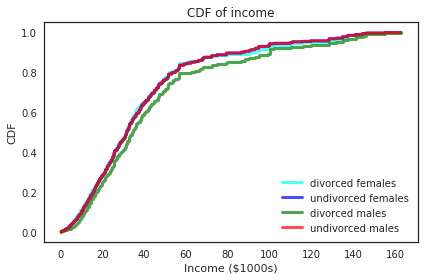

In [156]:
thinkplot.Cdf(cdf_dfeminc, label='divorced females', color='cyan')
thinkplot.Cdf(cdf_unfeminc, label='undivorced females', color='blue')
thinkplot.Cdf(cdf_dminc, label='divorced males', color='green')
thinkplot.Cdf(cdf_unminc, label='undivorced males', color='red')


decorate(title='CDF of income',xlabel='Income ($1000s)', ylabel='CDF')

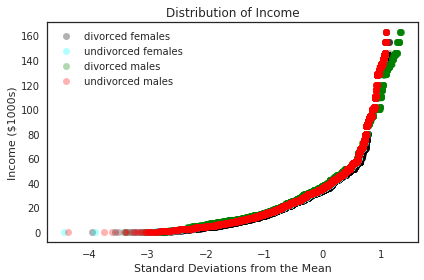

In [153]:
MakeNormalPlot(div_fem.realinc/1000, label='divorced females',
               color='black')
MakeNormalPlot(undiv_fem.realinc/1000, label='undivorced females',
               color='cyan')
MakeNormalPlot(div_m.realinc/1000, label='divorced males',
               color='green')
MakeNormalPlot(undiv_fem.realinc/1000, label='undivorced males',
               color='red')

decorate(title='Distribution of Income', 
         xlabel='Standard Deviations from the Mean', 
         ylabel='Income ($1000s)')

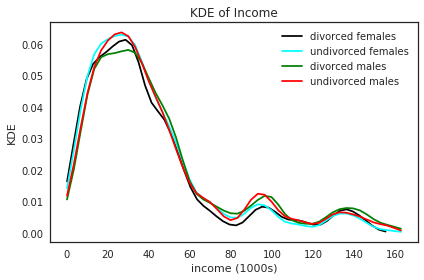

In [155]:
calc_kde(div_fem.realinc/1000,bw_method=.15,label='divorced females',
         xlab='income',color='black')
calc_kde(undiv_fem.realinc/1000,bw_method=.15,label='undivorced females',
         xlab='income',color='cyan')
calc_kde(div_m.realinc/1000,bw_method=.15,label='divorced males',
         xlab='income',color='green')
calc_kde(undiv_m.realinc/1000,bw_method=.15,label='undivorced males',
         xlab='income (1000s)',color='red')
decorate(title='KDE of Income',ylabel='KDE')

**I would call this slightly interesting. The CDFs of these different groups all look roughly similar, and the log transformations and visualizations I tried didn't do much to differentiate them. The most interesting thing to me is that undivorced males and females generally are very close together in terms of earnings, especially in the CDF and Normal Probability plots, with divorced females appearing to have slightly higher earnings and divorced males differentiating themselves the most with noticably higher incomes. The KDE plot at the bottom shows the most variation between groups, as the divorced males are still obviously the highest earners. Interestingly, the KDE points to undivorced males making more than either female group, even though it didn't seem like that was the case from the first two plots. I was expecting the males to outearn the females across the board, so it is interesting that not all of the distributions point to that. The fact that divorced people of either gender, but especially males, could be attributed to having less time with their children after separation and in turn focusing more on their careers.**